In [38]:
import pandas as pd                 #used to analyse numerical tables
import numpy as np                 #used for working with arrays
from sklearn.linear_model import LinearRegression          #used for machine learning
import matplotlib.pyplot as plt              #used to plot graphs of given data
import time             #it is a time related function

In [45]:
while(True):
  try:
    path=input("Enter the path of the csv file (heart.csv):")
    df = pd.read_csv(path)
  except FileNotFoundError:
    print('Sorry, we couldn\'t find the file asked for, please enter the path again.')
  else:
    break

Enter the path of the csv file (heart.csv):/content/heart.cs
Sorry, we couldn't find the file asked for, please enter the path again.
Enter the path of the csv file (heart.csv):content/heart.csv
Sorry, we couldn't find the file asked for, please enter the path again.
Enter the path of the csv file (heart.csv):/content/heart.csv


In [28]:
x = df.drop(columns=['target']).values                     #storing all feature values and not target values in x
y = df['target'].values                                    #storing only target values in y
#Finding mean values of different features from the data
age=df['age'].mean()
sex=df['sex'].mean()
cp=df['cp'].mean()
tbps=df['trestbps'].mean()
chol=df['chol'].mean()
fbs=df['fbs'].mean()
recg=df['restecg'].mean()
thalach=df['thalach'].mean()
mean=[age,cp,tbps,chol,fbs,recg,thalach]

In [29]:

#defining the linear regression model to predict the output based on existing data
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
print("HEART DISEASE PREDICTOR-Check if you have any heart related disease or not.")
print("Enter the below asked attributes to know the health of your heart...")
#Taking input of the user for different attributes
Age=float(input("AGE:"))
Sex=float(input("SEX (1=Male & 0=Female):"))
Cp=float(input("Chest Pain Type:"))
Tbps=float(input("Resting Blood Pressure (in mm Hg):"))
Chol=float(input("Serum Cholestoral (in mg/dl):"))
Fbs=float(input("Fasting Blood Sugar &gt; 120 mg/dl) (1 = true; 0 = false):"))
Recg=float(input("Resting Electrocardiographic Results:"))
Thalach=float(input("Maximum Heart Rate achieved:"))
Exang=float(input("Exercise Induced Angina (1 = yes; 0 = no):"))
Oldpeak=float(input("ST Depression Induced by Exercise Relative to Rest:"))
Slope=float(input("Slope of the Peak Exercise ST Segment:"))
Ca=float(input("Number of Major Vessels (0-3) Colored by Flourosopy:"))
Thal=float(input("3 = normal; 6 = fixed defect; 7 = reversable defect (Range from 0-):"))
#Adding all the data input by the user to a list
X_=[]
X_.extend([Age,Sex,Cp,Tbps,Chol,Fbs,Recg,Thalach,Exang,Oldpeak,Slope,Ca,Thal])
x_=X_[0:8]
x_.pop(1)
#Predicting the output to the values input by the user
X_1=[X_]
y_pred=model.predict(X_1)


HEART DISEASE PREDICTOR-Check if you have any heart related disease or not.
Enter the below asked attributes to know the health of your heart...
AGE:18
SEX (1=Male & 0=Female):1
Chest Pain Type:0
Resting Blood Pressure (in mm Hg):120
Serum Cholestoral (in mg/dl):0
Fasting Blood Sugar &gt; 120 mg/dl) (1 = true; 0 = false):0
Resting Electrocardiographic Results:0
Maximum Heart Rate achieved:140
Exercise Induced Angina (1 = yes; 0 = no):0
ST Depression Induced by Exercise Relative to Rest:0
Slope of the Peak Exercise ST Segment:0
Number of Major Vessels (0-3) Colored by Flourosopy:0
3 = normal; 6 = fixed defect; 7 = reversable defect (Range from 0-):3


In [34]:
#Returning the result to the inputs provided by the user
print("Your Result is being generated... Please wait...")
time.sleep(1.5)
if(y_pred[0]>=0 and y_pred[0]<0.25):
  print("It seems that you take a good care of your heart.")
elif(y_pred[0]>=0.25 and y_pred[0]<0.5):
  print("It seems that your heart is at a comparatively lower risk.")
elif(y_pred[0]>=0.5 and y_pred[0]<0.75):
  print("It seems that your heart is at a comparatively higher risk.")
elif(y_pred[0]>=0.75 and y_pred[0]<=1):
  print("It seems that your heart is at risk. Please consult a doctor.")
print("Your risk percentage is",y_pred[0]*100,"%")
print("If your risk percentage is less than 50 % then you need not worry much but if it is higher than 50 % then you need to take a good care.")

Your Result is being generated... Please wait...
It seems that your heart is at a comparatively lower risk.
Your risk percentage is 44.480837793542385 %
If your risk percentage is less than 50 % then you need not worry much but if it is higher than 50 % then you need to take a good care.


Would you like to compare your health parameters with the average of the world?(Y/N):y


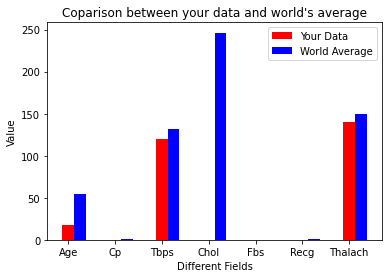

In [37]:
#using matplotlib to plot graph comparing user's inputs to world averages
q='n'
num=np.arange(7)
x_=X_[0:8]
x_.remove(Sex)
q=input("Would you like to compare your health parameters with the average of the world?(Y/N):")
if(q=='n' or q=='N'):
  pass
elif(q=='y' or q=='Y'):
  plt.bar(num,x_,color='r',width=0.25,label='Your Data')
  plt.bar(num+0.25,mean,color='blue',width=0.25,label='World Average')
  plt.legend(loc='upper right')
  plt.xticks(num,['Age','Cp','Tbps','Chol','Fbs','Recg','Thalach'])
  plt.title('Coparison between your data and world\'s average')
  plt.xlabel('Different Fields')
  plt.ylabel('Value')
  plt.show()
else:
  q=input("Please enter a valid input to the above question (Y/N):")
